In [1]:
import os
os.chdir("../")

import pickle

from visualization import Visualization

In [2]:
project = 'rehersal ResNet CIFAR10 Task IL batch_size'


viz = Visualization(project=project,UID=['rehearsal_dataset', 'batch_size_rehearsal', 'learning_rate', 'epochs'], y_min=30)

In [3]:
viz.extract_all_runs_metrics_after_task_3()

Could not fetch metrics in run: 65 UID: stat-wmm;128;0.003;5; exception: "None of [Index(['acc_test_task_0', 'acc_test_task_1', 'acc_test_task_2',\n       'acc_test_task_3', 'acc_test_task_4'],\n      dtype='object')] are in the [columns]"
Could not fetch metrics in run: 66 UID: stat-wmm;128;0.003;5; exception: "None of [Index(['acc_test_task_0', 'acc_test_task_1', 'acc_test_task_2',\n       'acc_test_task_3', 'acc_test_task_4'],\n      dtype='object')] are in the [columns]"
Could not fetch metrics in run: 67 UID: stat-wmm;128;0.003;5; exception: "None of [Index(['acc_test_task_0', 'acc_test_task_1', 'acc_test_task_2',\n       'acc_test_task_3', 'acc_test_task_4'],\n      dtype='object')] are in the [columns]"
Could not fetch metrics in run: 68 UID: stat-wmm;128;0.003;5; exception: "None of [Index(['acc_test_task_0', 'acc_test_task_1', 'acc_test_task_2',\n       'acc_test_task_3', 'acc_test_task_4'],\n      dtype='object')] are in the [columns]"
Could not fetch metrics in run: 69 UID: 

In [4]:
from matplotlib import pyplot as plt
import numpy as np


def box_plot(metric_name, df, filename=None, fontsize=20):
    UIDS = df['UID'].unique()

    values = []
    for uid in UIDS:
        values.append(int(df[df['UID'] == uid]['batch_size_rehearsal'].iloc[0]))

    order = np.argsort(values)
    UIDS = UIDS[order]

    plt.figure(figsize=(20, 10))
    for i, uid in enumerate(UIDS):
        plt.boxplot(df[df['UID'] == uid][metric_name], positions=[i], widths=0.6)

    labels = UIDS
    labels = [f"{uid.split(';')[1]}" for uid in UIDS]

    plt.xticks(np.arange(len(UIDS)), labels, rotation=90, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)  # Add this line to set the font size of the y-axis
    plt.title(f"metric: {metric_name}", fontsize=fontsize)
    plt.xlabel("unique identifier", fontsize=fontsize)
    plt.ylabel("accuracy [%]", fontsize=fontsize)

    if filename:
        plt.savefig("images/"+filename+".pdf", format='pdf')
        plt.savefig("images/"+filename+".svg", format='svg')

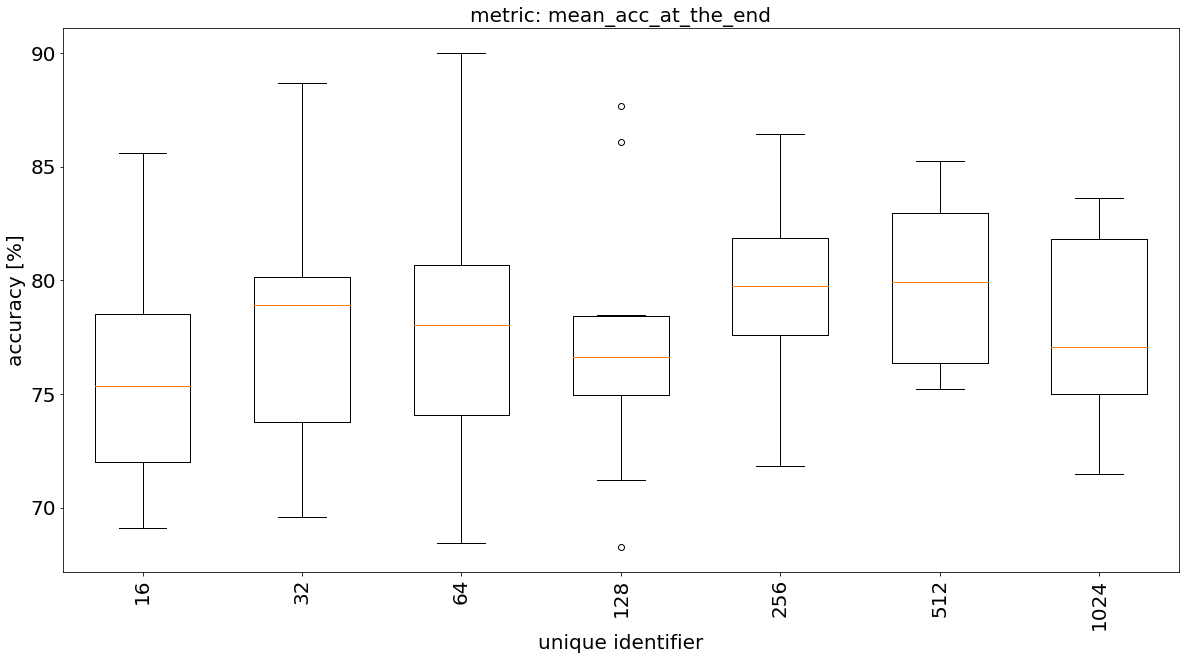

In [5]:
df = viz.metrics_df.copy()

metric = 'mean_acc_at_the_end'
box_plot(metric, df, filename=f"batch_size_{metric}")

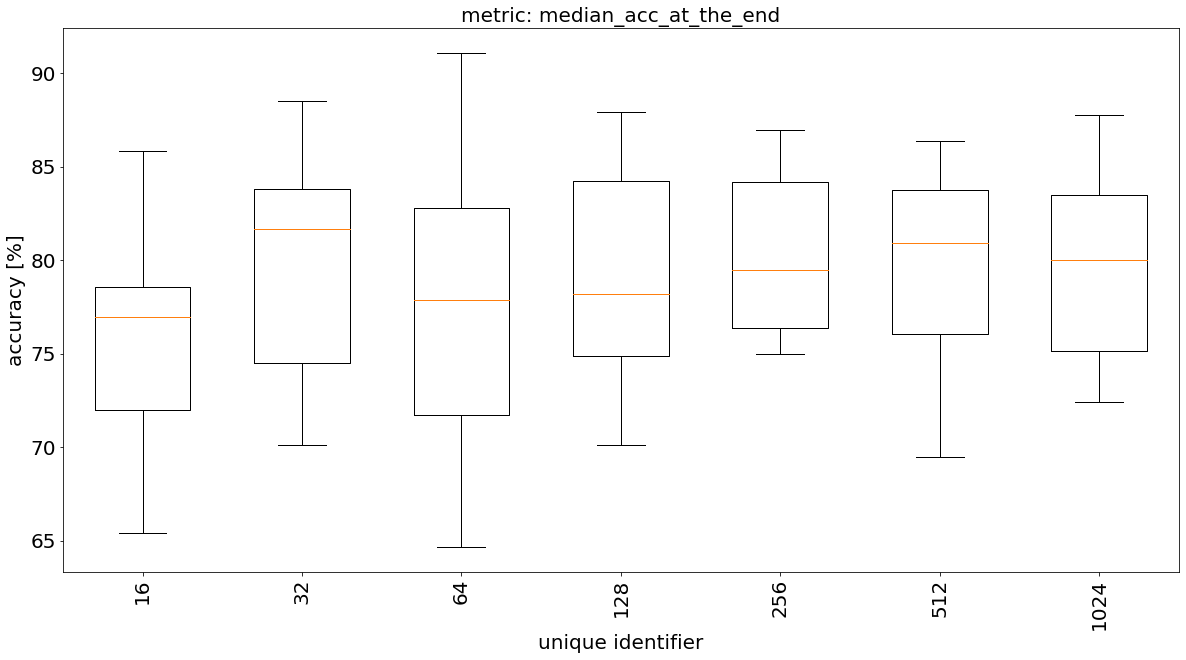

In [6]:
metric = 'median_acc_at_the_end'
box_plot(metric, df, filename=f"batch_size_{metric}")

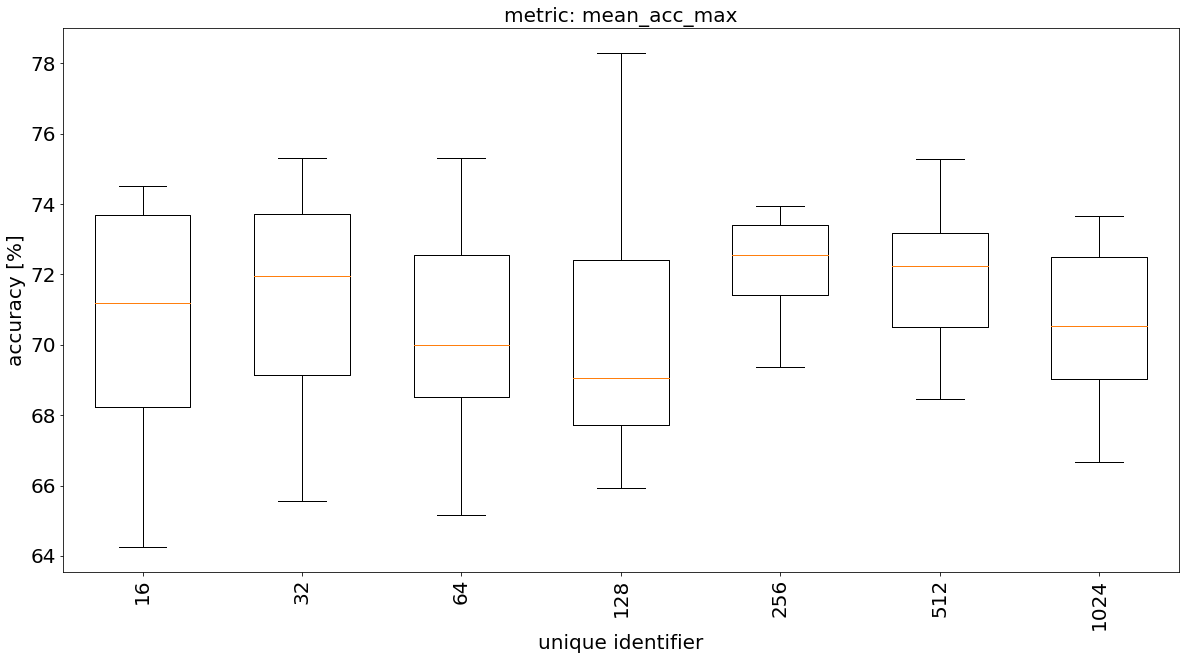

In [7]:
metric = 'mean_acc_max'
box_plot(metric, df, filename=f"batch_size_{metric}")

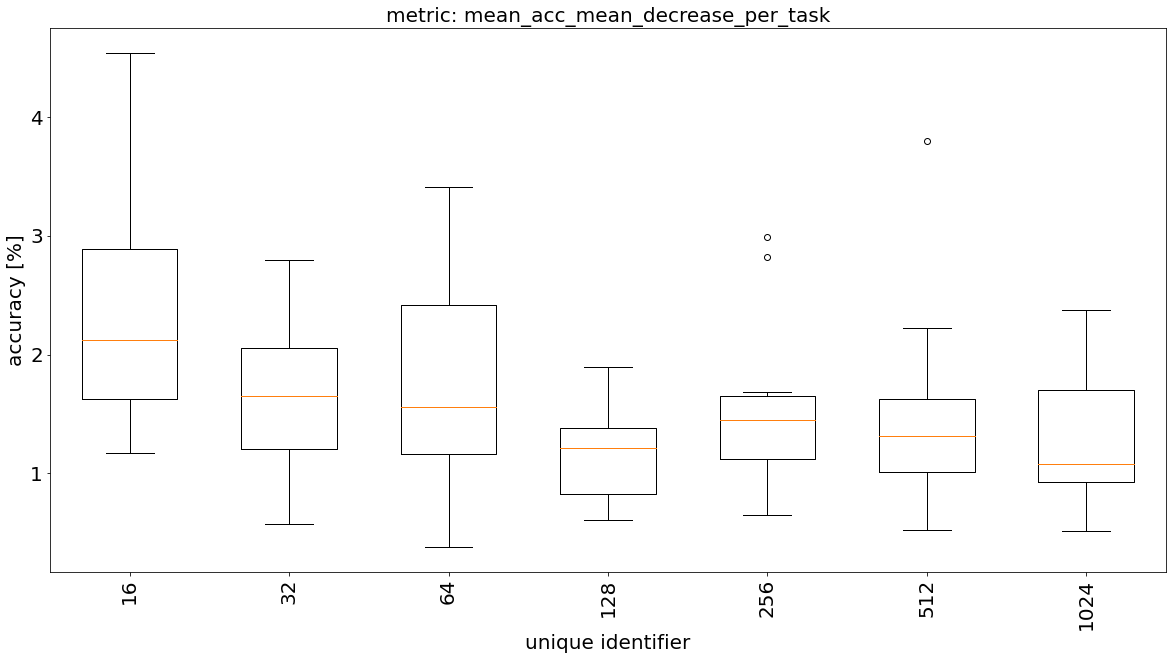

In [8]:
metric = 'mean_acc_mean_decrease_per_task'
box_plot(metric, df, filename=f"batch_size_{metric}")

In [9]:
df

UID  acc_at_the_end_task_0  acc_mean_task_0  \
0   stat-wmm;64;0.003;5;              81.150002        84.564583   
1   stat-wmm;64;0.003;5;              73.900002        71.912500   
2   stat-wmm;64;0.003;5;              56.299999        57.035833   
3   stat-wmm;64;0.003;5;              82.400002        81.297917   
4   stat-wmm;64;0.003;5;              69.199997        68.122083   
..                   ...                    ...              ...   
65  stat-wmm;16;0.003;5;              78.300003        82.132083   
66  stat-wmm;16;0.003;5;              64.699997        66.585833   
67  stat-wmm;16;0.003;5;              73.199997        71.482917   
68  stat-wmm;16;0.003;5;              61.700001        64.289167   
69  stat-wmm;16;0.003;5;              86.349998        84.956667   

    acc_mean_decrease_per_task_0   acc_max0   acc_min0  acc_at_the_end_task_1  \
0                       2.237499  90.099998  55.000000              83.150002   
1                       0.775000  77.000000  51.250000              87.000000   
2                       1.950000  64.099998  50.700001              64.650002   
3                       1.000000  86.400002  52.599998              72.849998   
4                       1.112501  73.650002  51.549999              79.550003   
..                           ...        ...        ...                    ...   
65                      2.974998  90.199997  57.099998              75.400002   
66                      1.650002  71.300003  50.500000              65.400002   
67                      1.725000  80.099998  52.950001              81.199997   
68                      2.374999  71.199997  46.500000              81.400002   
69                      0.662500  89.000000  48.599998              78.349998   

    acc_mean_task_1  acc_mean_decrease_per_task_1   acc_max1  ...  split  \
0         78.349479                      2.733332  91.349998  ...   test   
1         79.132292                      0.516668  88.550003  ...   test   
2         60.532812                      0.599998  66.449997  ...   test   
3         67.944792                      1.233335  76.550003  ...   test   
4         73.335937                      0.783333  81.900002  ...   test   
..              ...                           ...        ...  ...    ...   
65        73.788542                      3.916667  87.150002  ...   test   
66        64.894792                      2.716667  73.550003  ...   test   
67        76.395833                      3.516668  91.750000  ...   test   
68        75.062501                      0.883334  84.050003  ...   test   
69        72.148958                      0.850001  80.900002  ...   test   

    rehearsal_dataset  batch_size_rehearsal  learning_rate  epochs  \
0            stat-wmm                    64          0.003       5   
1            stat-wmm                    64          0.003       5   
2            stat-wmm                    64          0.003       5   
3            stat-wmm                    64          0.003       5   
4            stat-wmm                    64          0.003       5   
..                ...                   ...            ...     ...   
65           stat-wmm                    16          0.003       5   
66           stat-wmm                    16          0.003       5   
67           stat-wmm                    16          0.003       5   
68           stat-wmm                    16          0.003       5   
69           stat-wmm                    16          0.003       5   

    mean_acc_at_the_end  median_acc_at_the_end  mean_acc_mean  \
0             81.916667              81.449997      33.770087   
1             81.383334              83.250000      31.278750   
2             68.466666              64.650002      29.113184   
3             74.733332              72.849998      31.439341   
4             77.633334              79.550003      31.218094   
..                  ...                    ...            ...   
65            76.73333

In [10]:
df.value_counts('UID')

UID
stat-wmm;1024;0.003;5;    10
stat-wmm;128;0.003;5;     10
stat-wmm;16;0.003;5;      10
stat-wmm;256;0.003;5;     10
stat-wmm;32;0.003;5;      10
stat-wmm;512;0.003;5;     10
stat-wmm;64;0.003;5;      10
dtype: int64

c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:405: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           79.98 &     80.08 &               1.23 &  test \\
    1 &           77.96 &     73.42 &               1.60 &  test \\
    2 &           81.02 &     66.15 &               0.11 &  test \\
    3 &           50.07 &     50.43 &               0.96 &  test \\
    4 &           51.03 &     51.59 &               0.00 &  test \\
\bottomrule
\end{tabular}



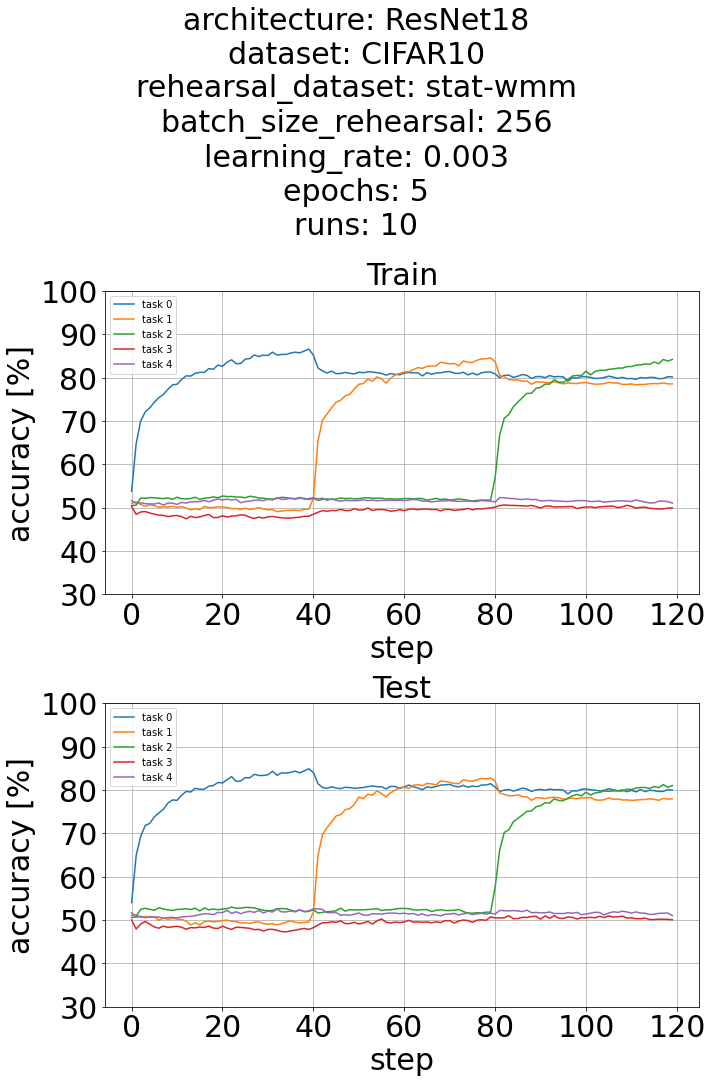

In [11]:
viz.plot_single_setting_aggregated('stat-wmm;256;0.003;5', fontsize=30, filename='batch_size_256', layout='vertical_short', plot_till=3/5)

c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:405: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           76.92 &     77.71 &               1.53 &  test \\
    1 &           78.16 &     72.82 &               0.76 &  test \\
    2 &           84.16 &     66.65 &               0.05 &  test \\
    3 &           52.80 &     52.80 &               2.04 &  test \\
    4 &           48.73 &     48.57 &               0.00 &  test \\
\bottomrule
\end{tabular}



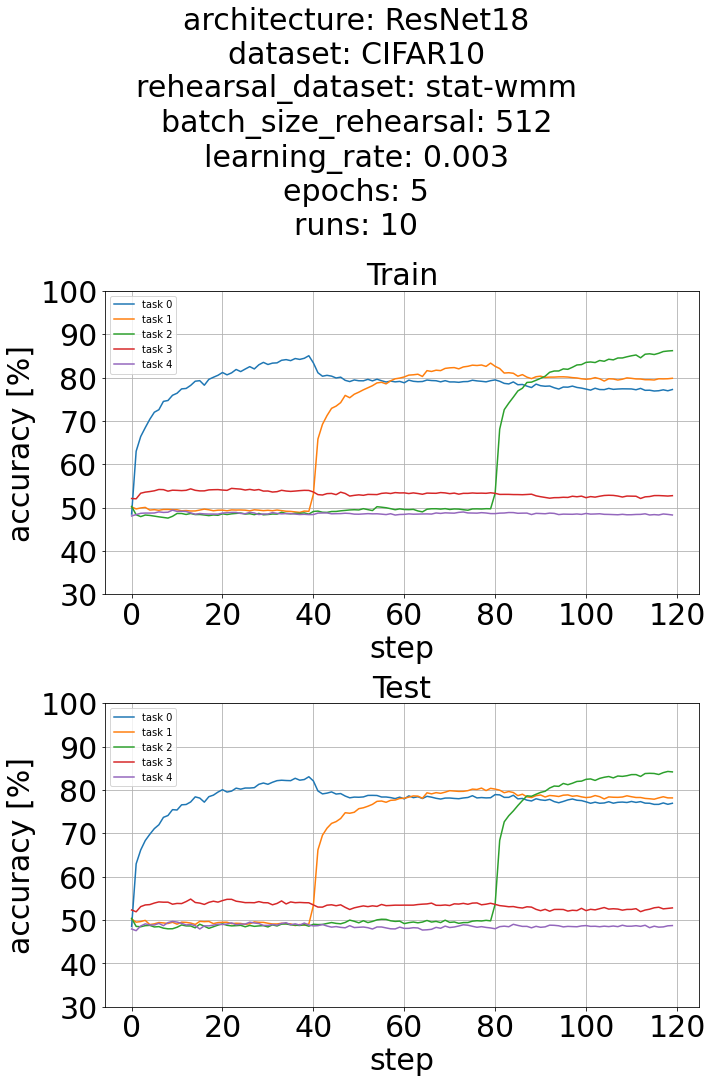

In [12]:
viz.plot_single_setting_aggregated('stat-wmm;512;0.003;5', fontsize=30, filename='batch_size_512', layout='vertical_short', plot_till=3/5)

c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:405: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           73.13 &     74.45 &               1.66 &  test \\
    1 &           76.05 &     72.33 &               1.59 &  test \\
    2 &           79.05 &     63.21 &               0.00 &  test \\
    3 &           48.93 &     49.33 &               3.21 &  test \\
    4 &           49.77 &     49.28 &               0.00 &  test \\
\bottomrule
\end{tabular}



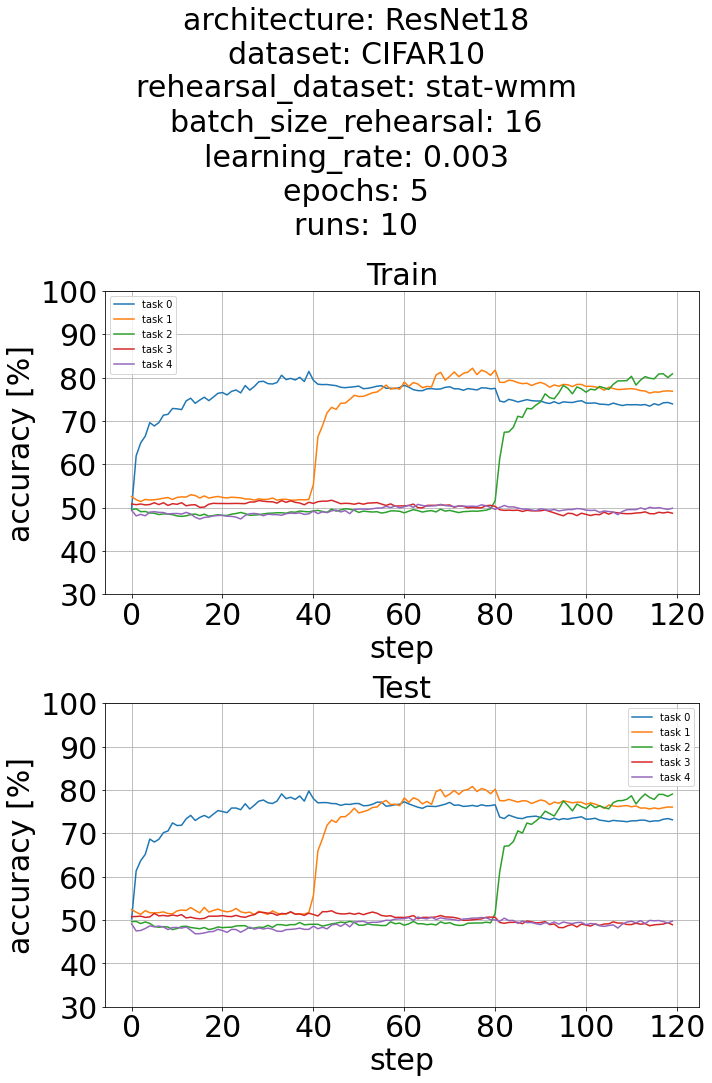

In [13]:
viz.plot_single_setting_aggregated('stat-wmm;16;0.003;5', fontsize=30, filename='batch_size_16', layout='vertical_short', plot_till=3/5)

# All runs

Error in run: 70 Error: "None of [Index(['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4'], dtype='object')] are in the [columns]"
Error in run: 71 Error: "None of [Index(['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4'], dtype='object')] are in the [columns]"
Error in run: 72 Error: "None of [Index(['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4'], dtype='object')] are in the [columns]"
Error in run: 73 Error: "None of [Index(['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4'], dtype='object')] are in the [columns]"
Error in run: 74 Error: "None of [Index(['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4'], dtype='object')] are in the [columns]"
Error in run: 75 Error: "None of [Index(['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3', 'acc_task_4'], dtype='object')] are in the [columns]"
Error in run: 76 Error: "None of [Index(['acc_task_0', 'acc_task_1', 'acc_task_2', 'acc_task_3

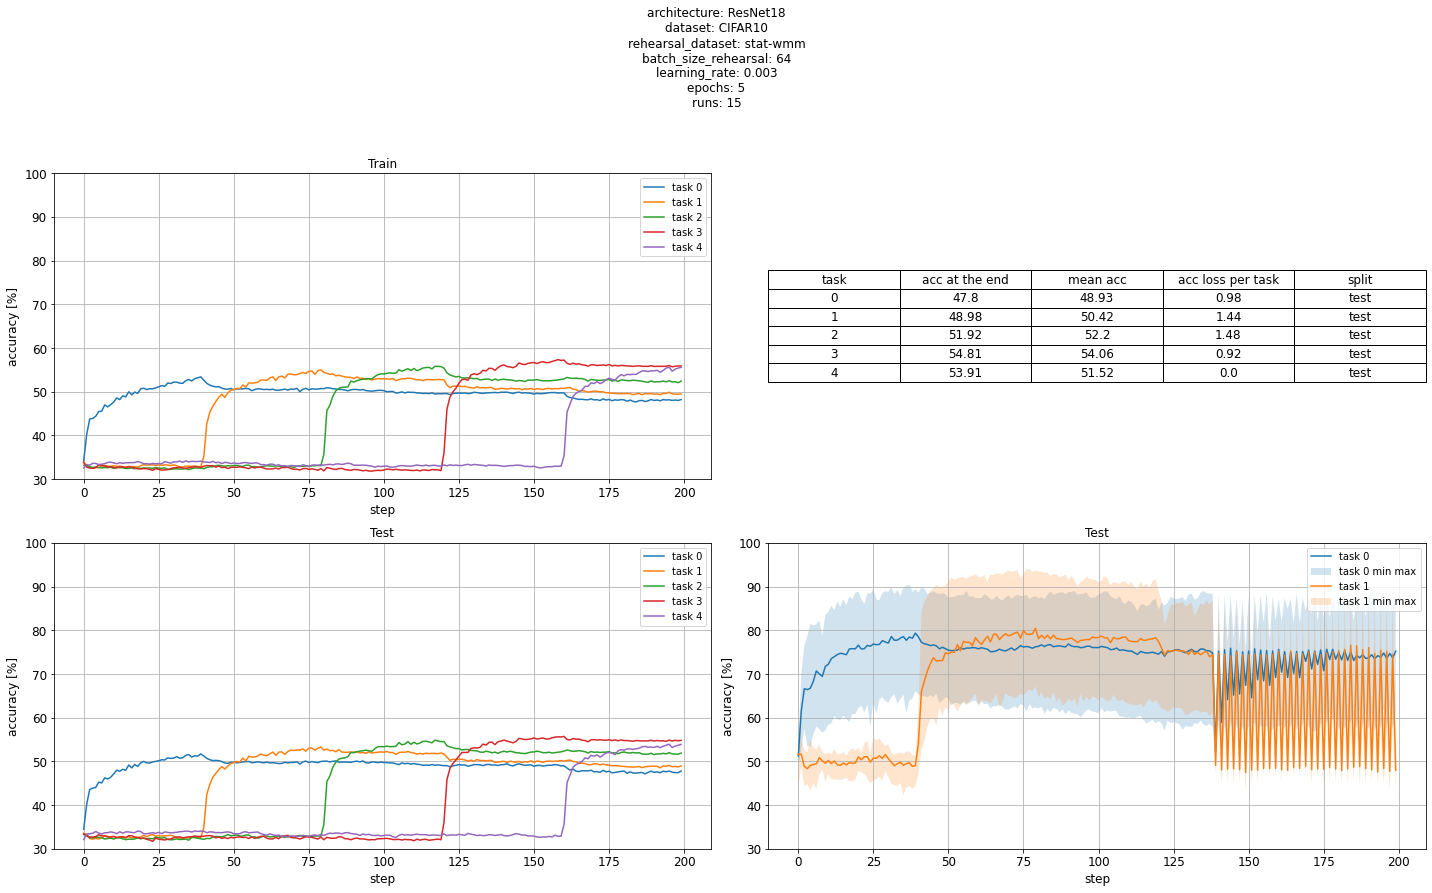

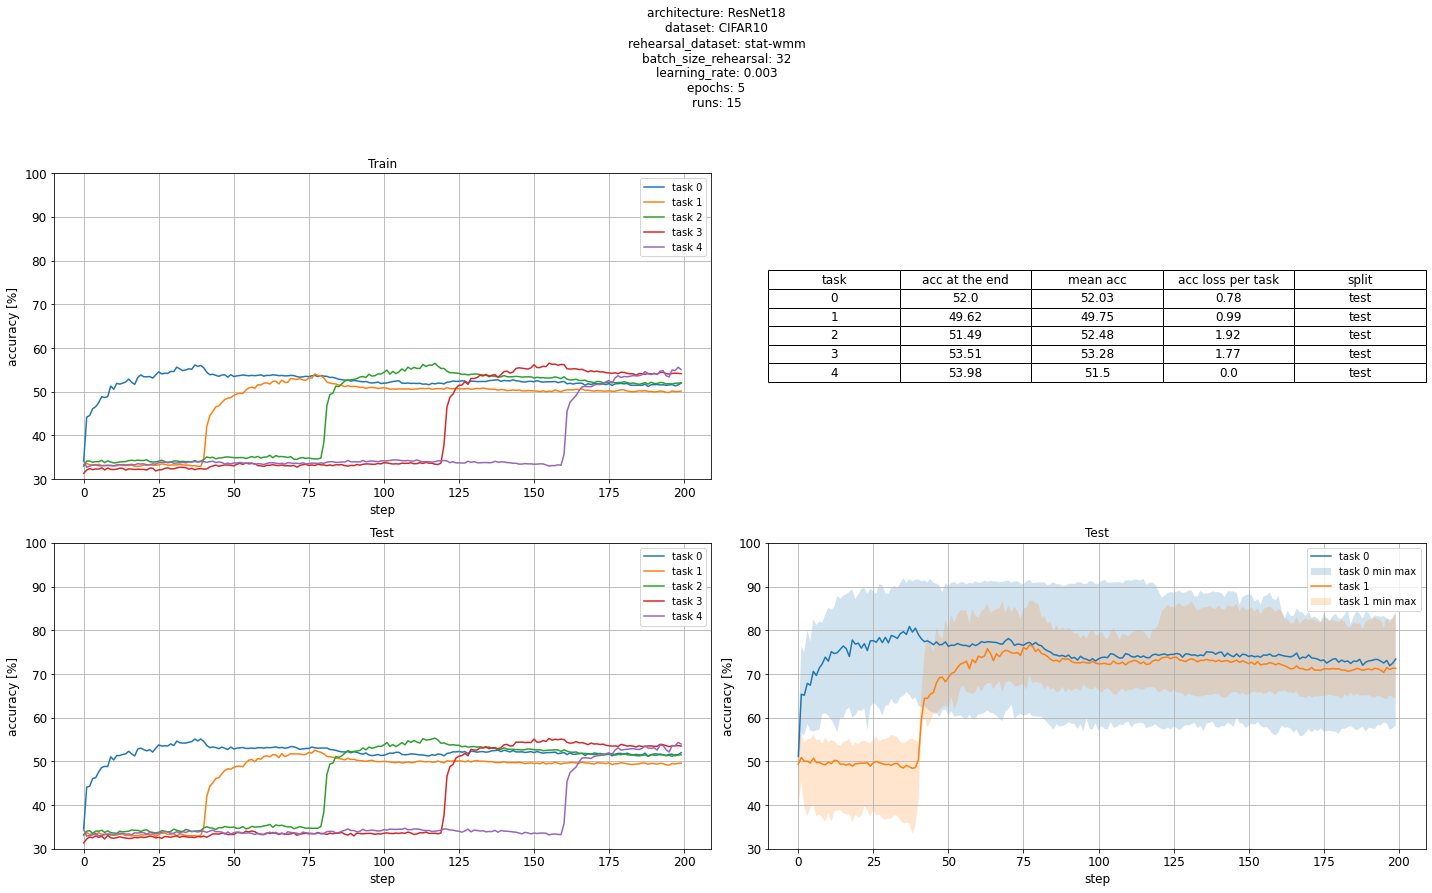

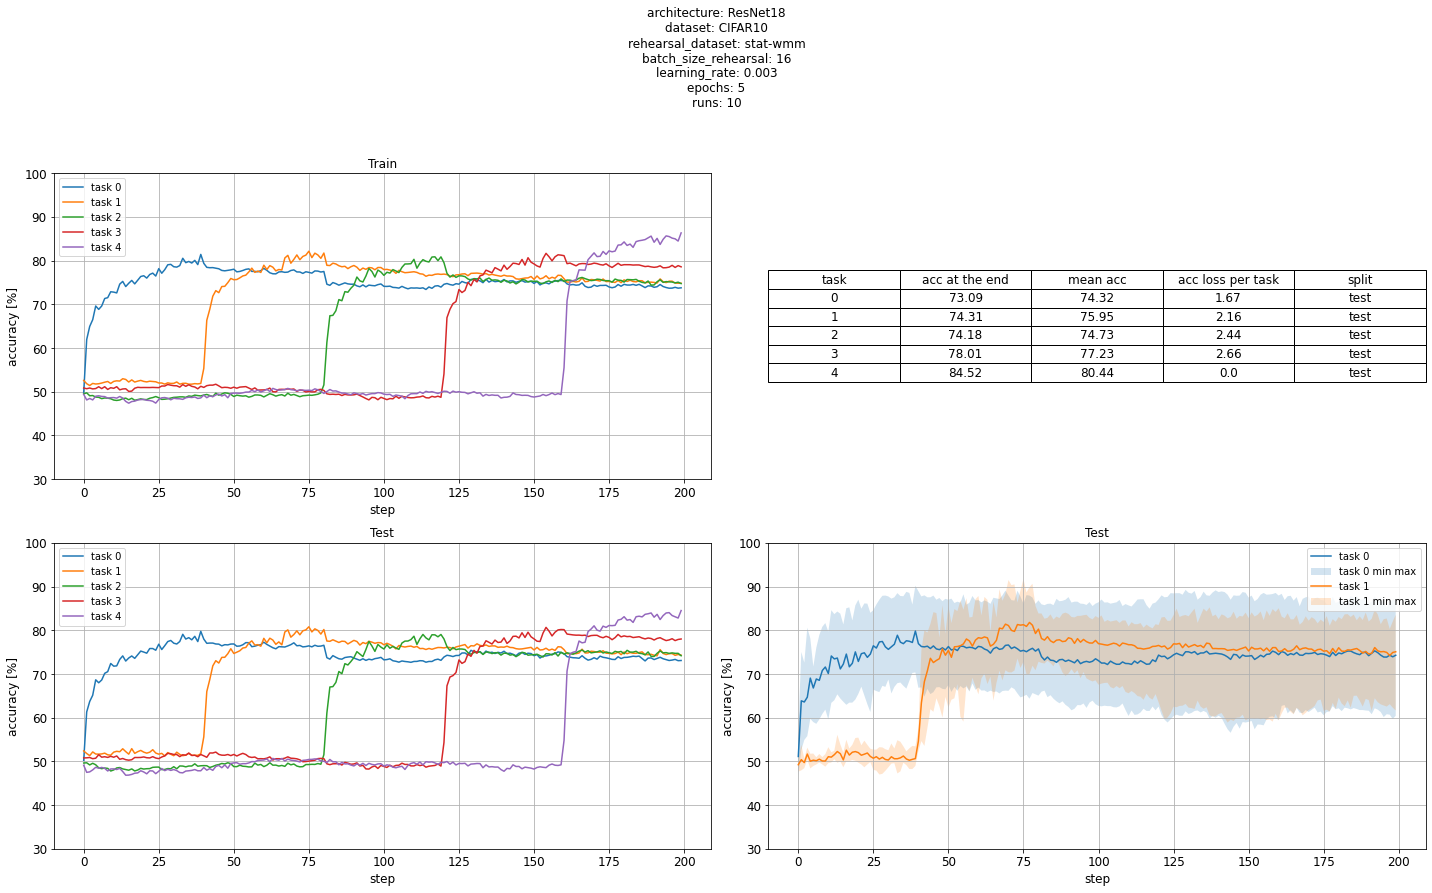

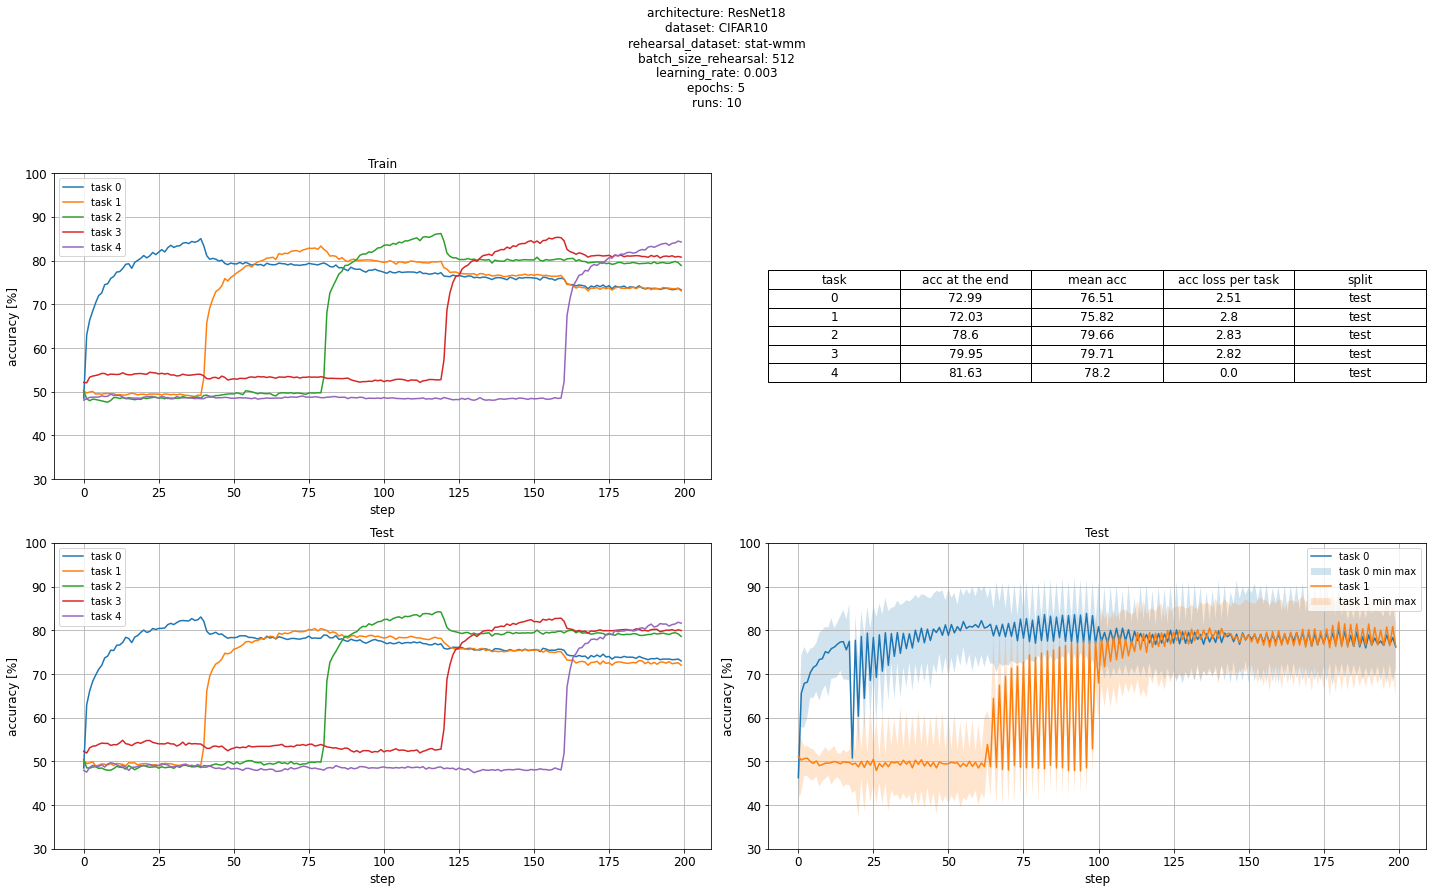

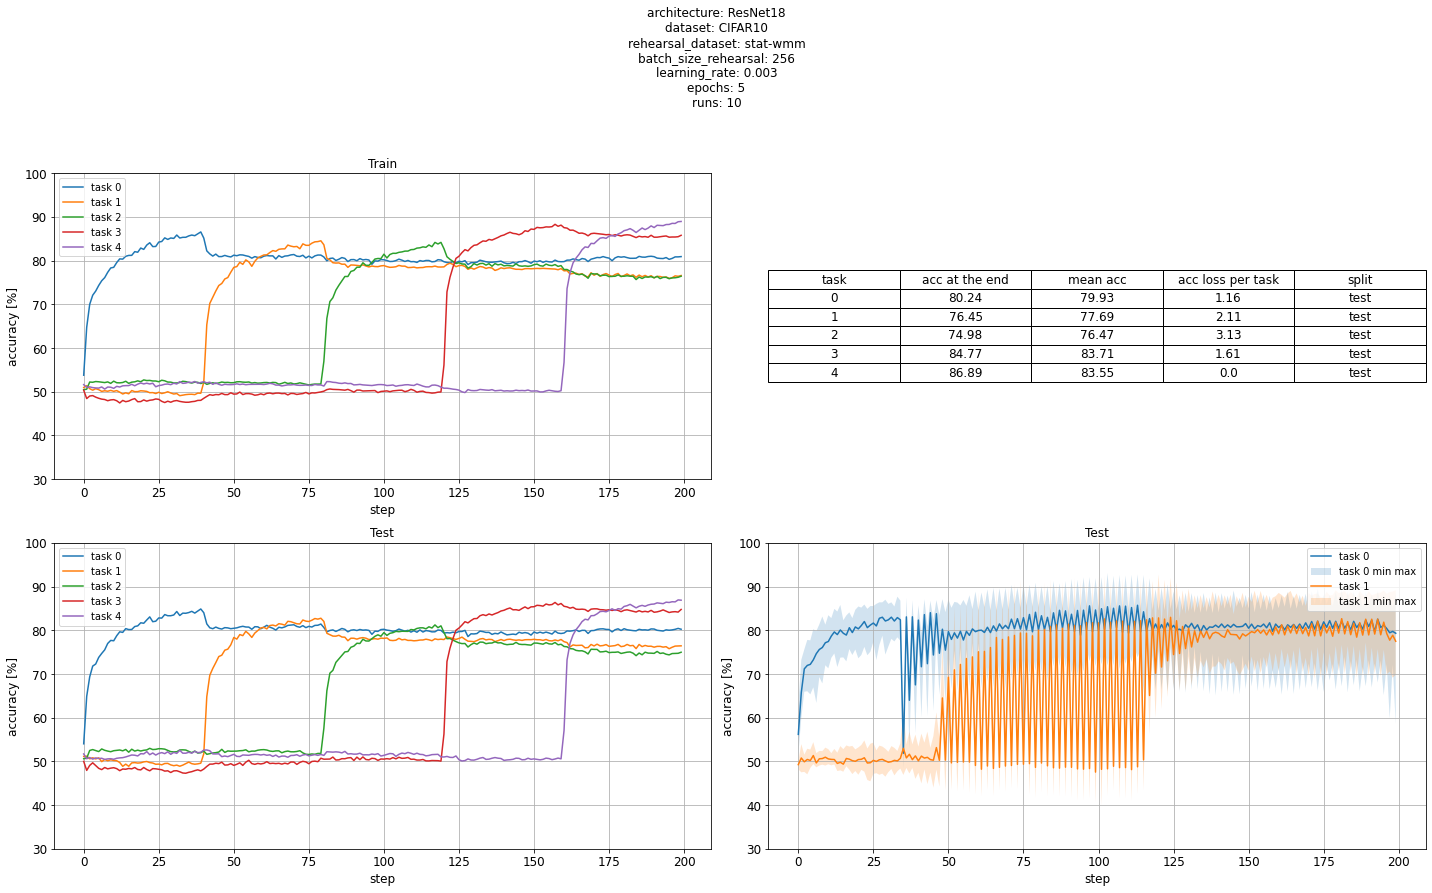

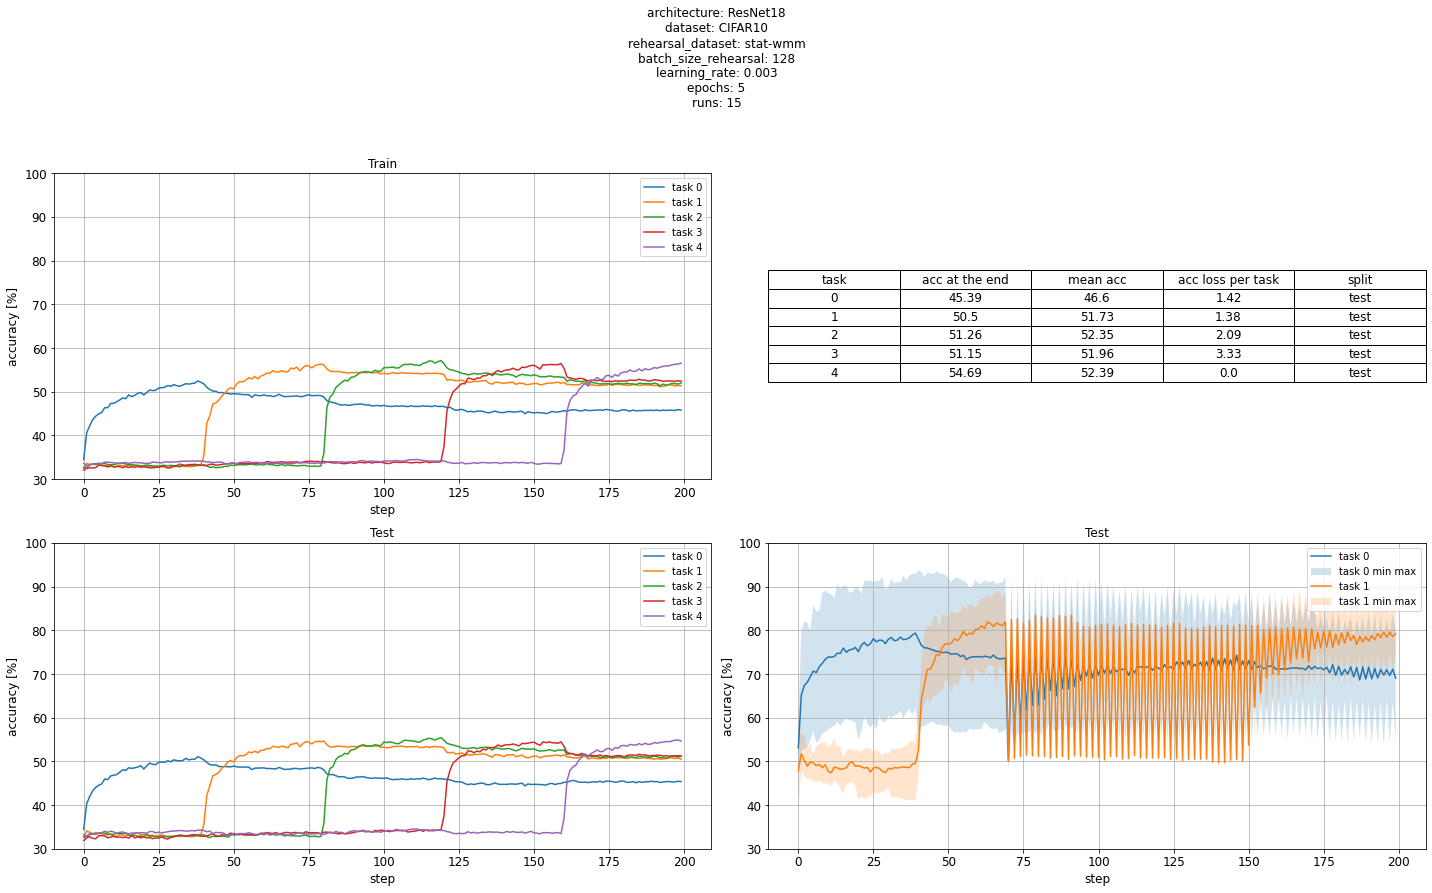

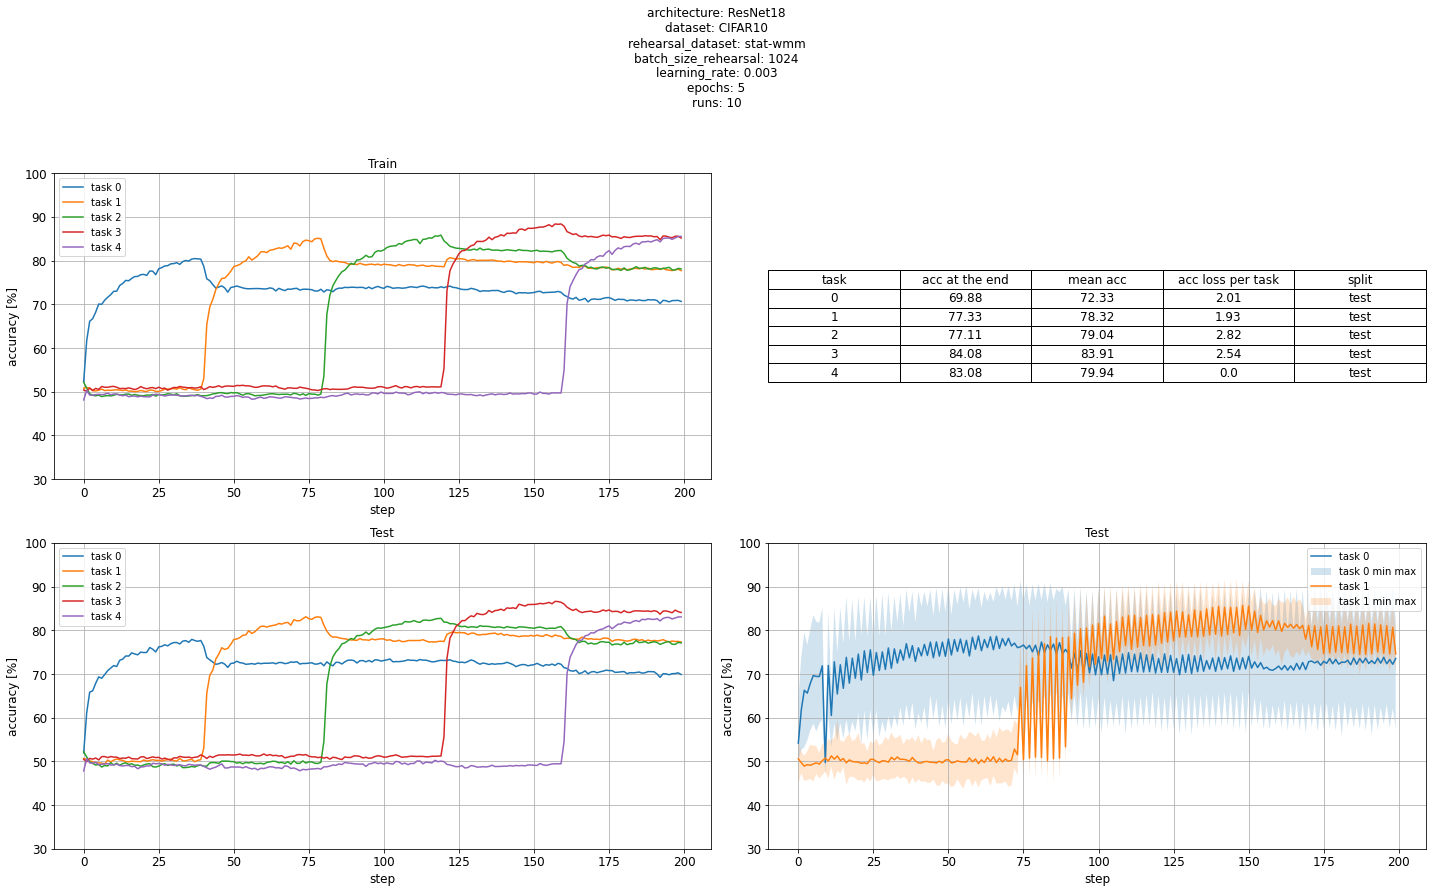

In [14]:
viz.plot_everything()

In [15]:
viz.runs_params_settings_idxs_dict.keys()

dict_keys(['stat-wmm;64;0.003;5', 'stat-wmm;32;0.003;5', 'stat-wmm;16;0.003;5', 'stat-wmm;512;0.003;5', 'stat-wmm;256;0.003;5', 'stat-wmm;128;0.003;5', 'stat-wmm;1024;0.003;5'])

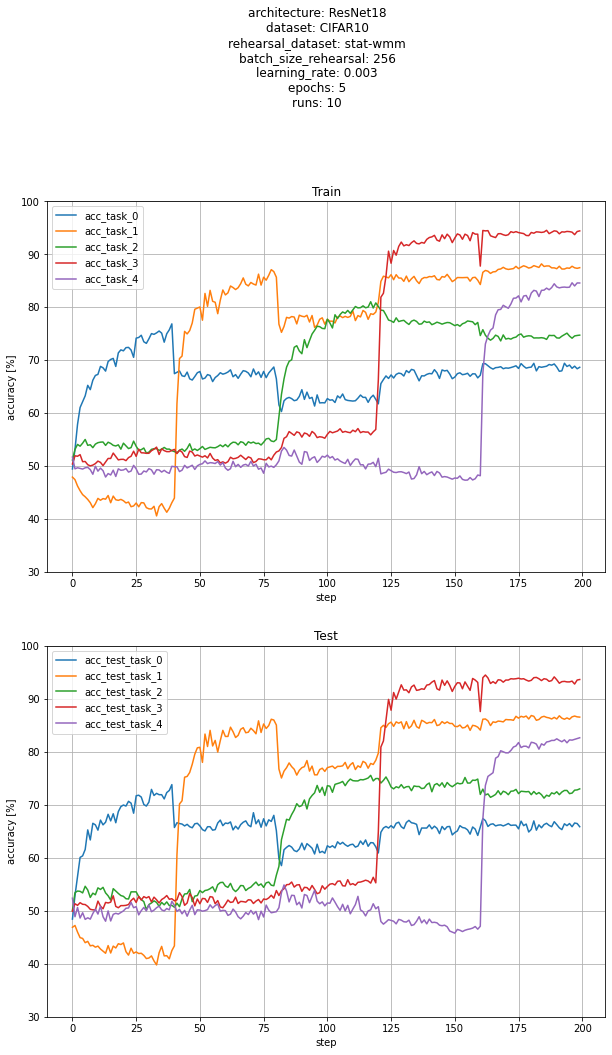

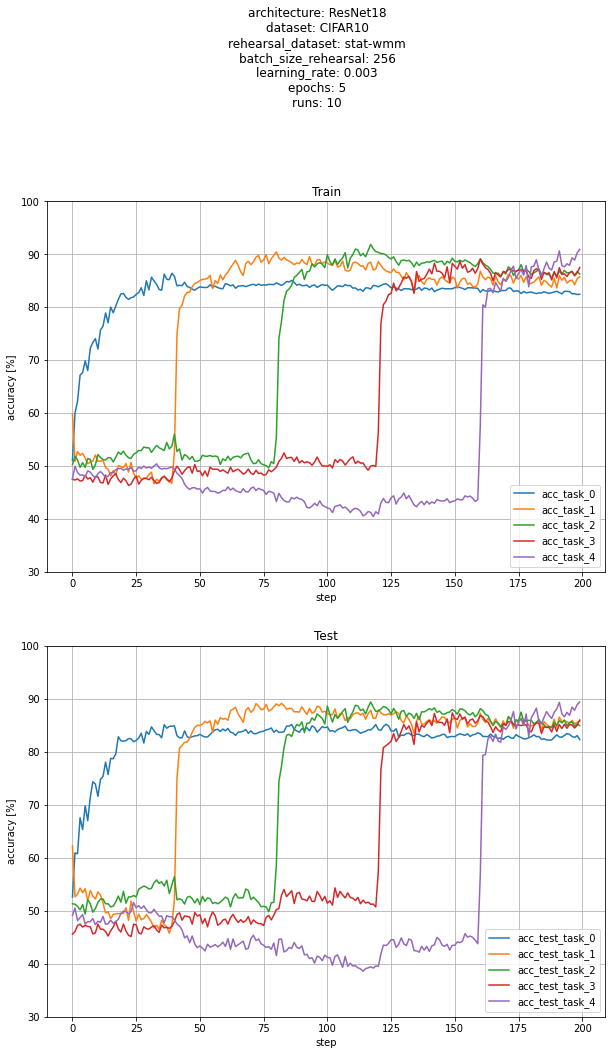

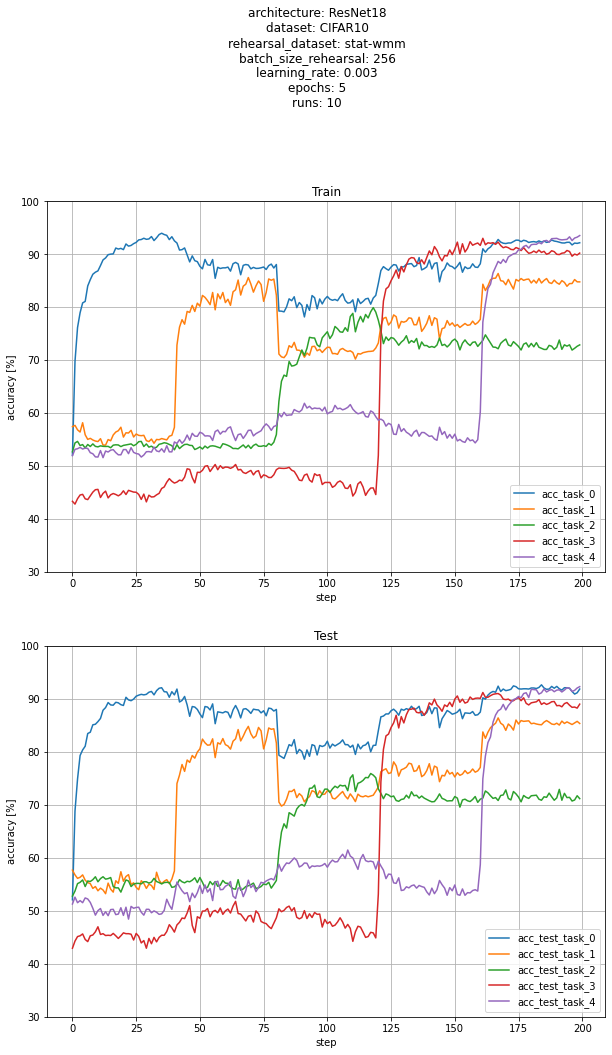

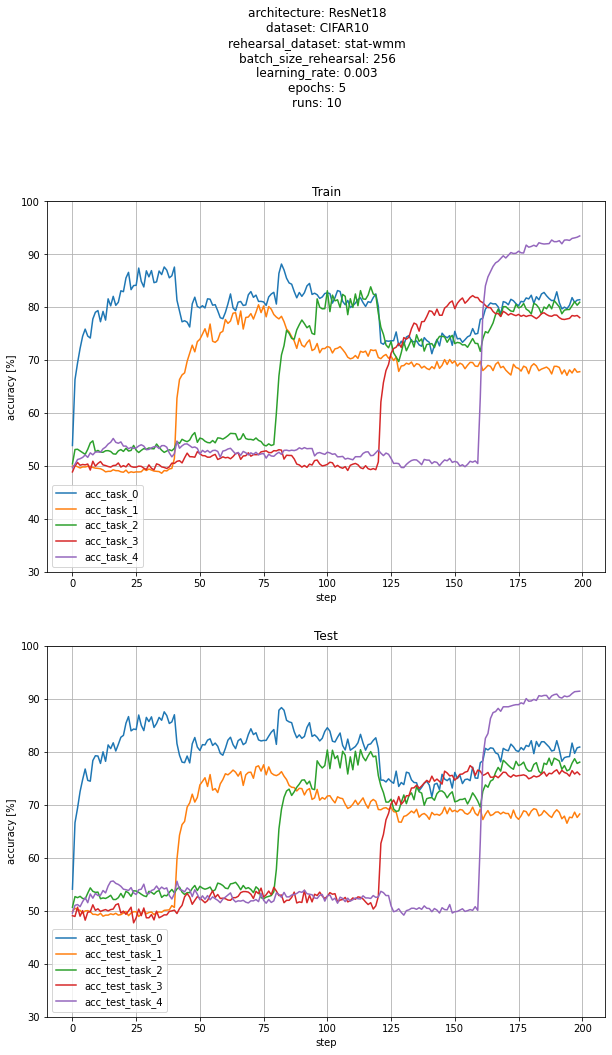

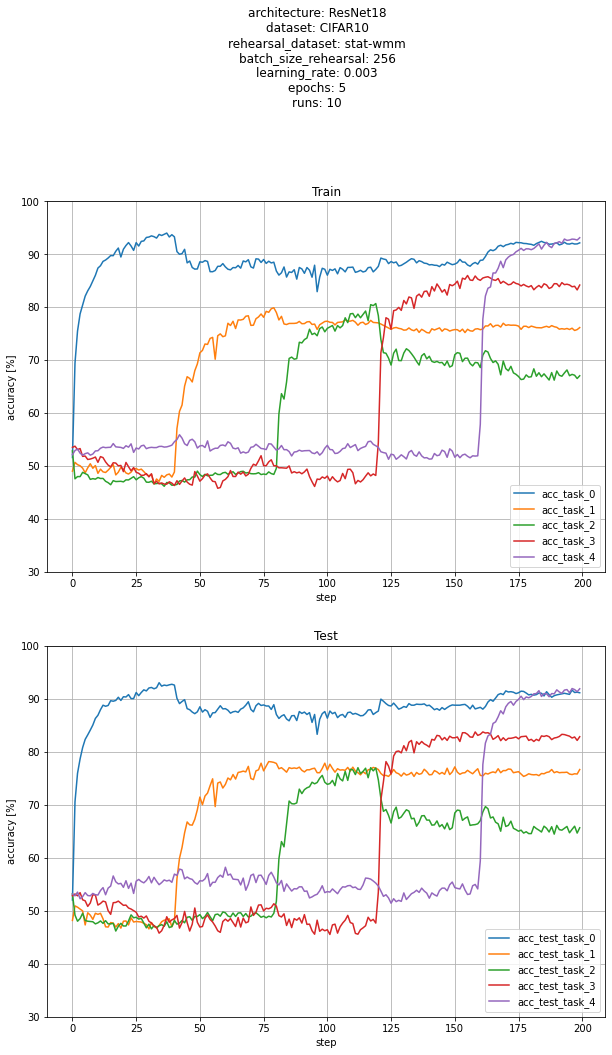

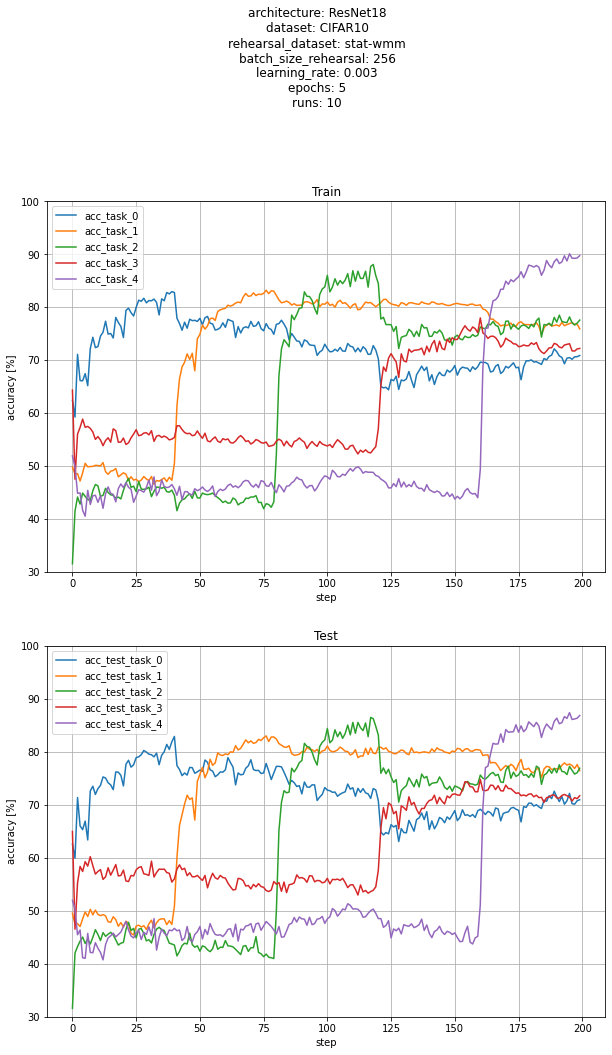

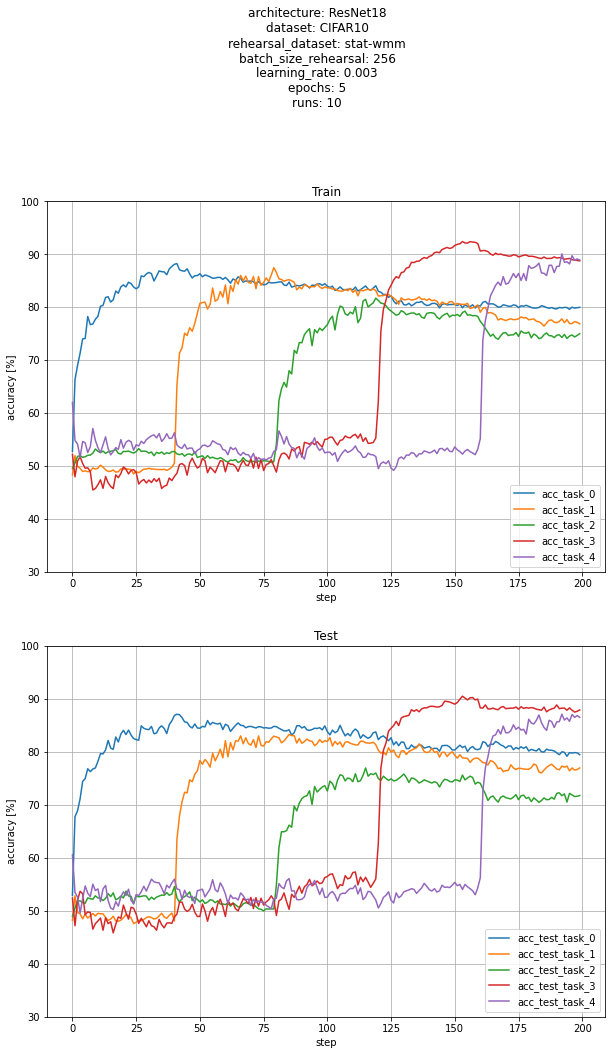

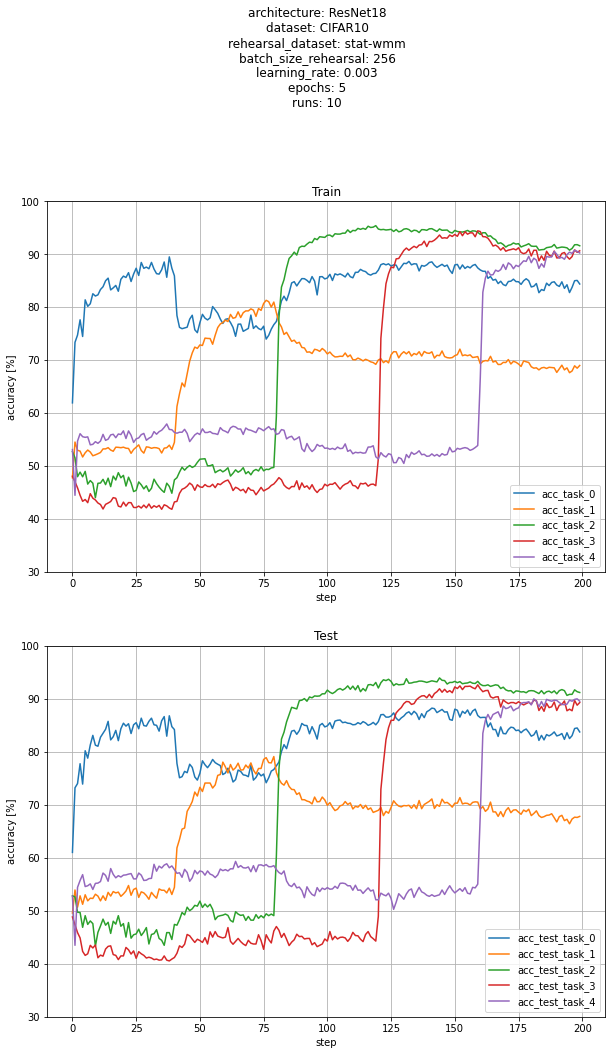

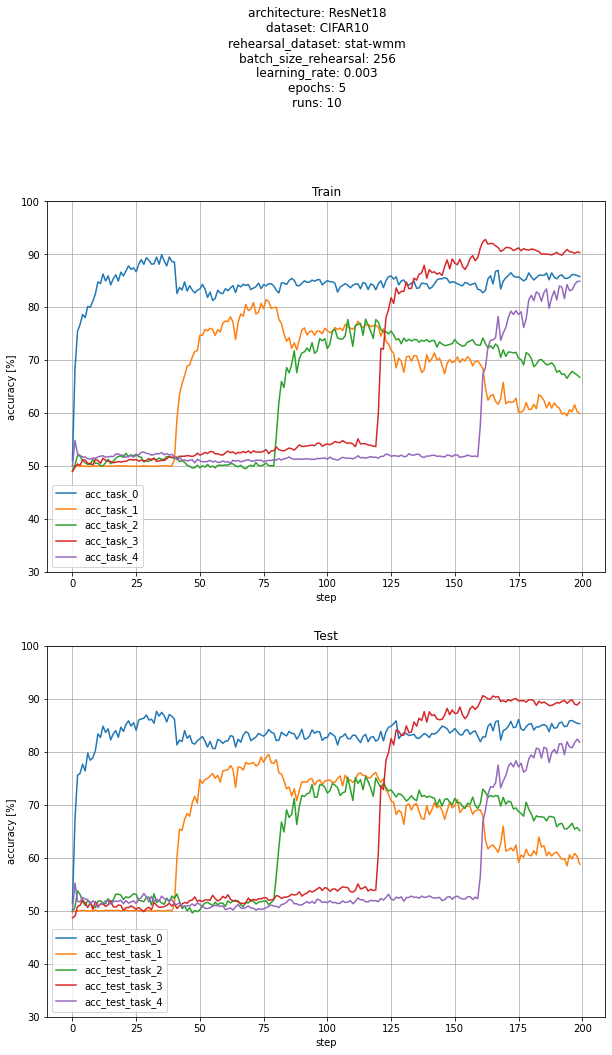

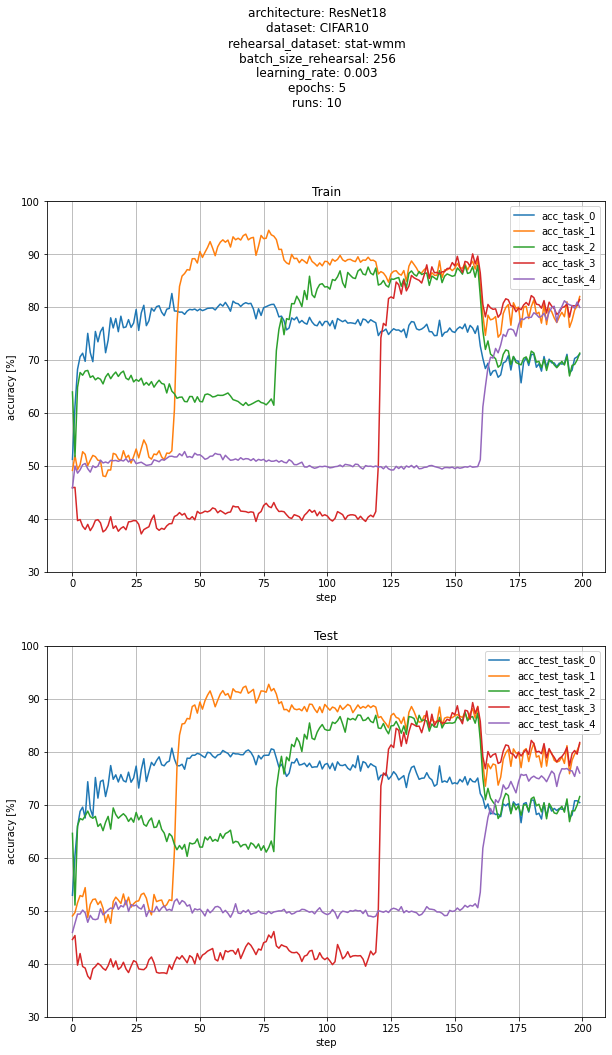

In [16]:
viz.plot_single_setting_all_runs('stat-wmm;256;0.003;5')

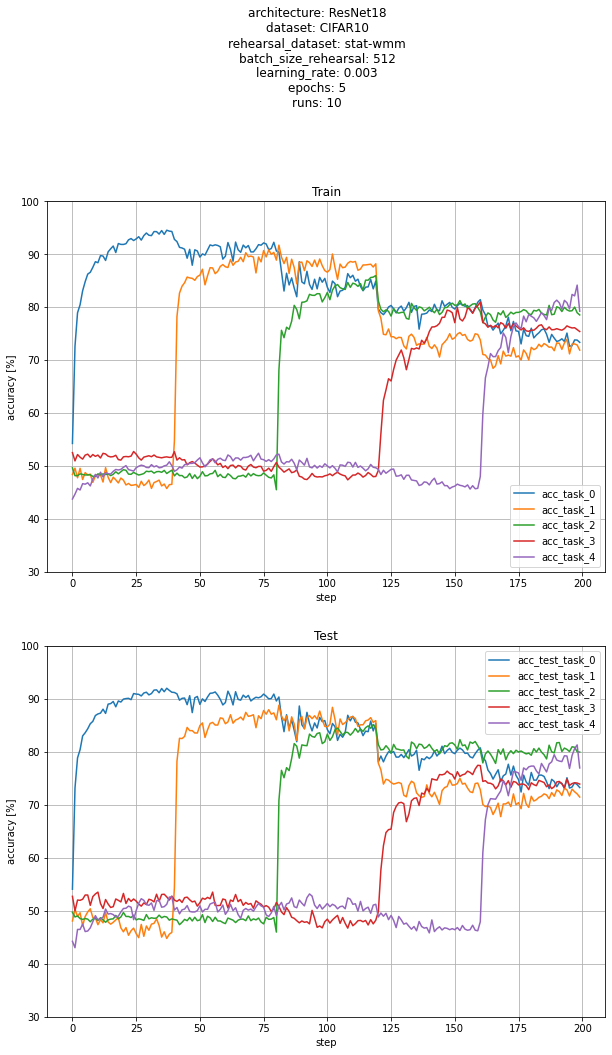

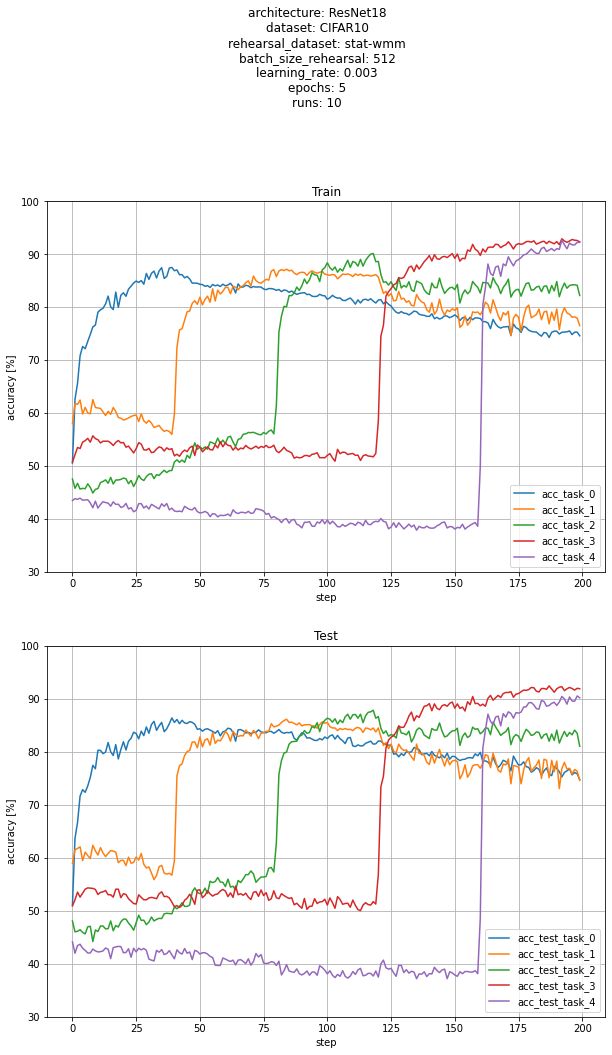

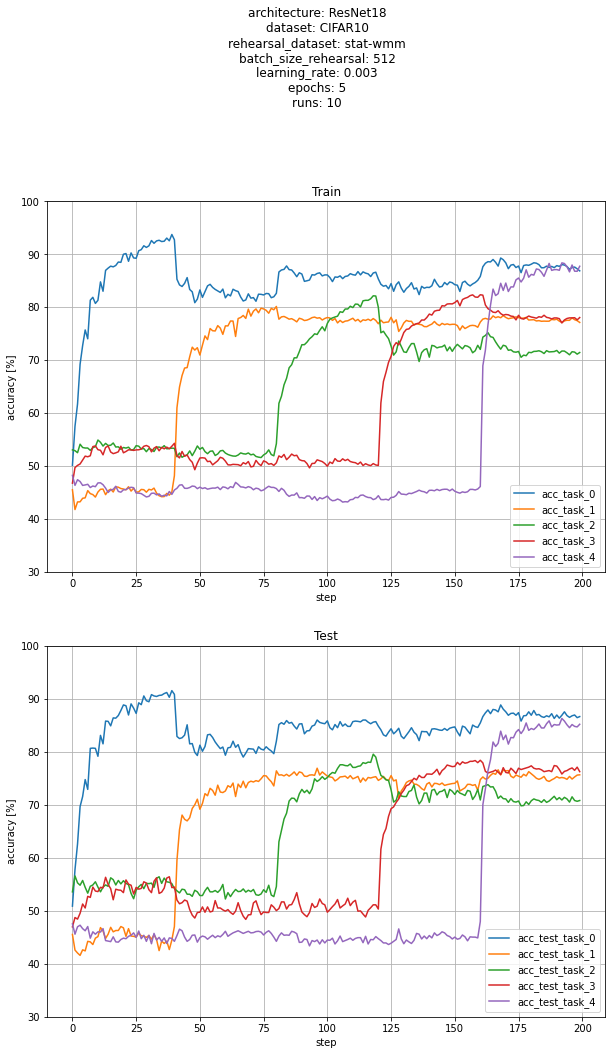

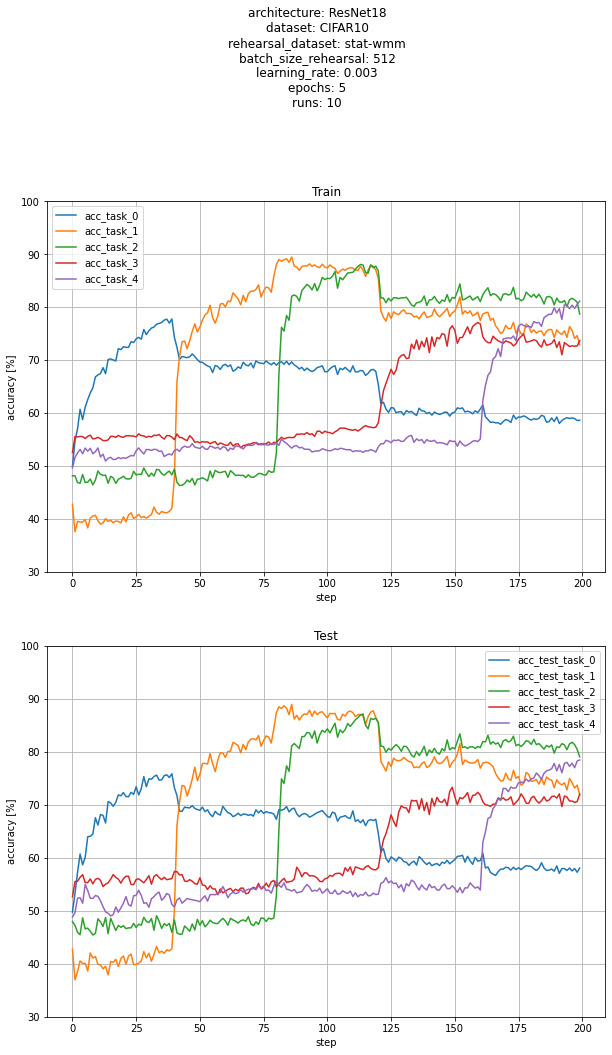

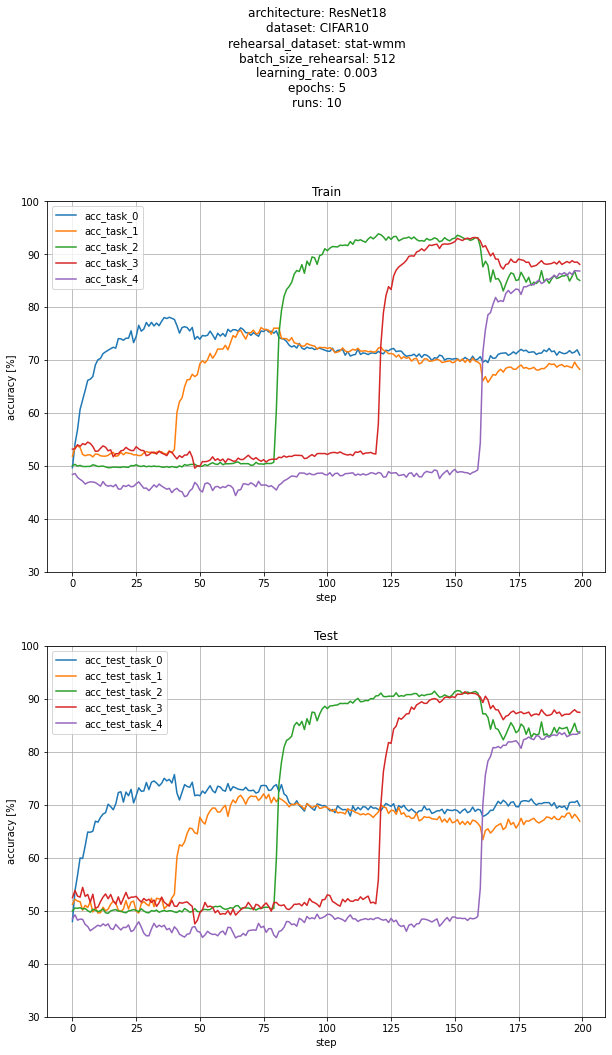

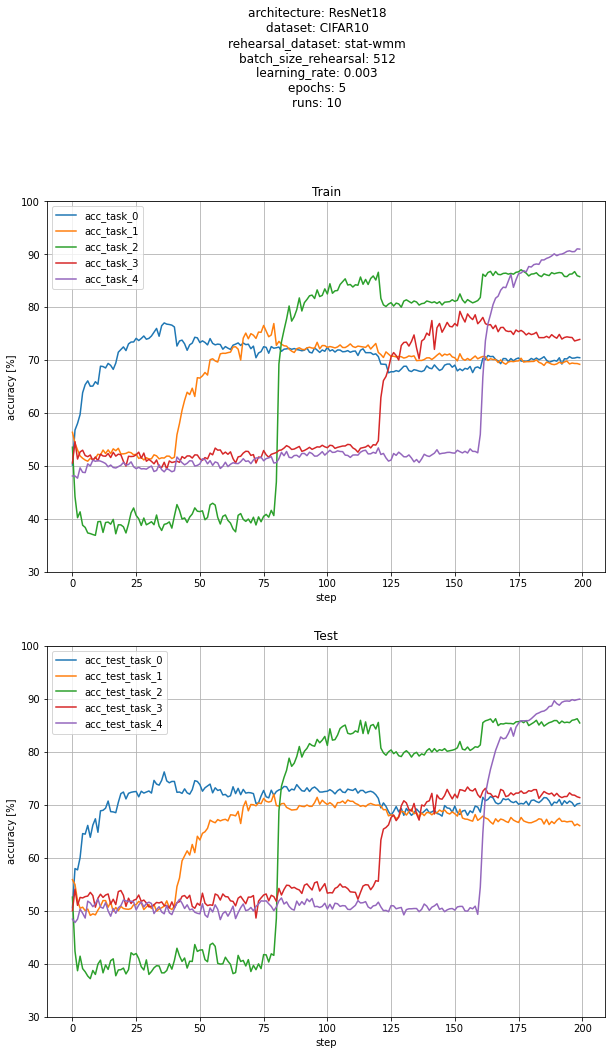

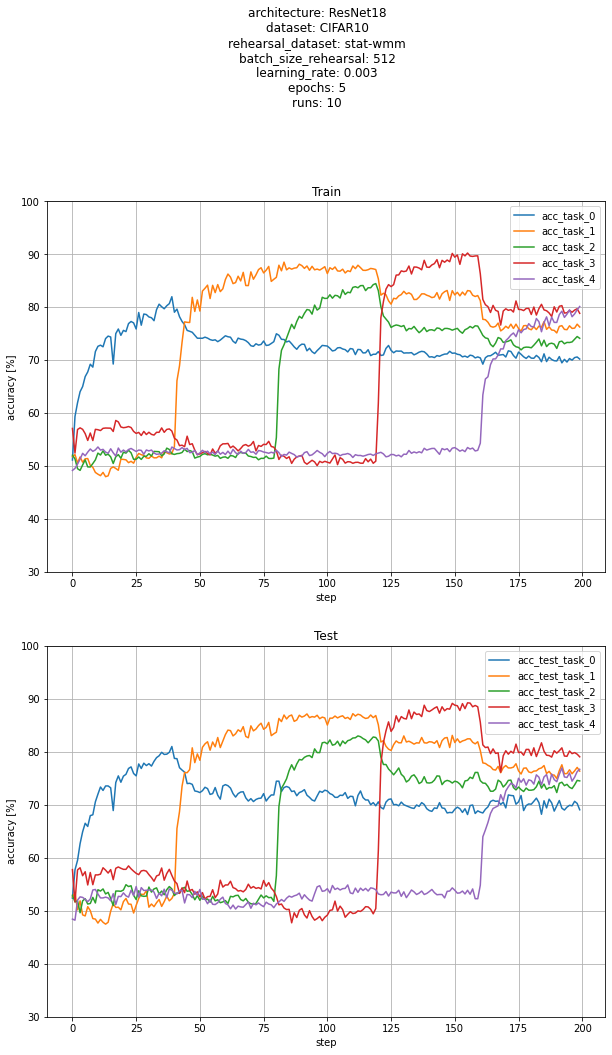

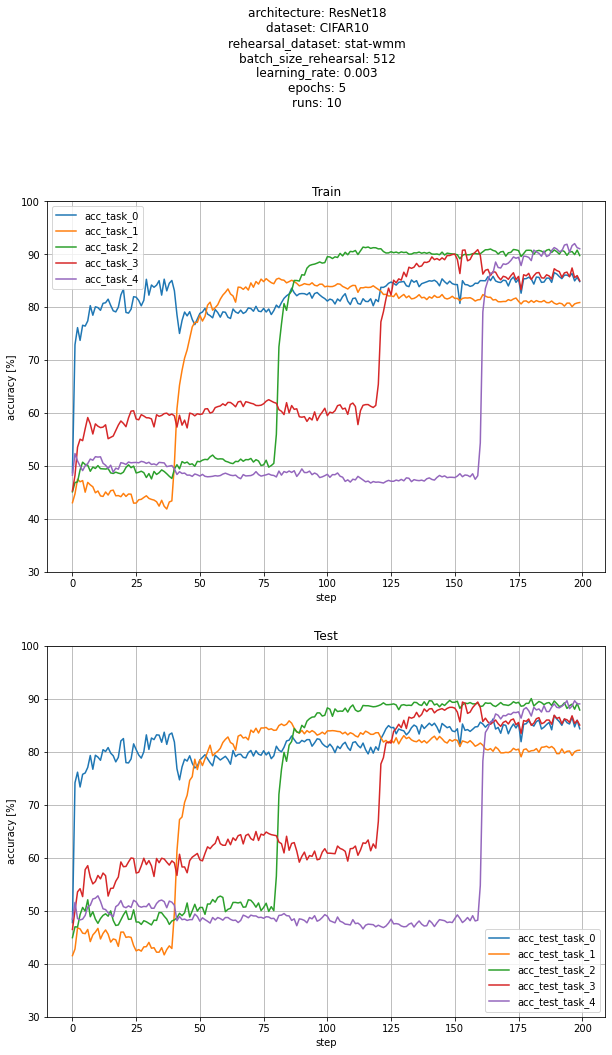

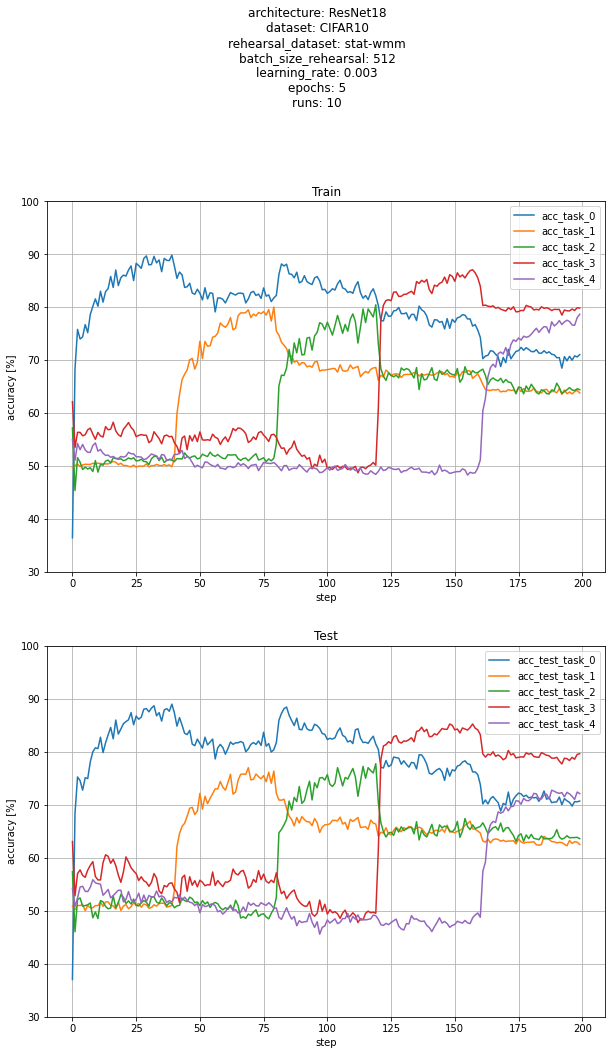

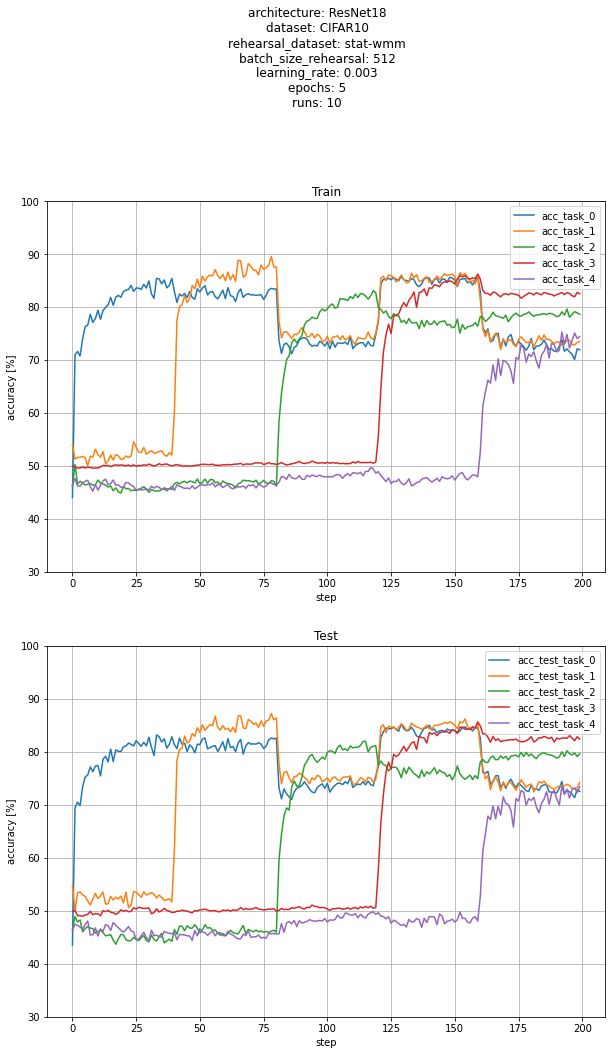

In [18]:
viz.plot_single_setting_all_runs('stat-wmm;512;0.003;5')